## CS 237 Homework 03 B (Programming Problems) 

**Due Thursday February 17th at Midnight (1 minute after 11:59pm) in Gradescope (with grace period of 6 hours).
Homeworks may be submitted up to 24 hours late with a 10% penalty (same grace period).**

Enter your solutions in this notebook and submit as an IPYNB file on Gradescope. Don't forget to include information about your collaborators (or say **Collaborators: none**).


**Collaborators:**  


In [6]:
# Imports potentially used for this hw

import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi, floor       
from numpy.random import seed, random
from collections import Counter

%matplotlib inline

# This function will take a list of integer outcomes and displays the
# distribution 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()


## General Instructions

In lecture, we saw how random variables can be implemented by Python functions. 
In this homework, we will pursue this idea in detail, exploring how to simulate a random variable:

   > 1. By simulating the original physical experiment using random number generators;
   > 2. By using an explicit formula; and 
   > 3. By using the CDF. 

In all these we will convert a random variate in the range $[0..1)$ created by
the `numpy.random` function `random()` into a random variate from a different distribution. 

This homework will only involve creating **discrete** random variables from the continuous random variable
implemented by `random()`, but we will see that the same
general techniques can be used to create arbitrary continuous random variables as well. 

Do not use any other libraries than those imported above without explicit permission from the instructors. 


## Problem 1: Creating a Random Variable by Simulation (3 pts)

In this problem, you will implement the random variables $X_i$ and $B$ from lecture
on Thursday 2/10 and verify by experiment the PDFs shown there:

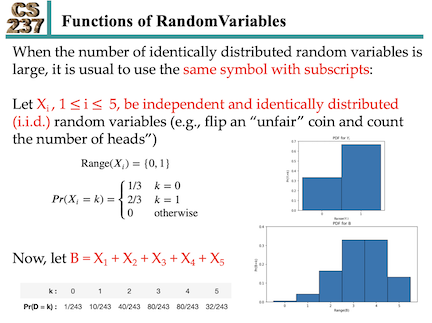


You must complete the following function templates to create $X$ and $B$ as described,
using *only* the function `random()` from the `numpy.random` library. 

Note that we do not need to create five different Python functions $X()$; the indices shown in
lecture are simply to indicate that we have five different "calls" to the same random
variable $X$.  You may call $X()$ fives times in a loop, or (better!) use a list comprehension 
(look at the definition of  `CM` on slide 20 in Lecture 6 for inspiration, although there we used a tuple, not a list).  


Demonstrate your solution by generating $10^5$ random variates for the parameters shown and displaying them using `show_distribution(...)`.


 ### Part (A): Simulate X
 
 You must figure out a way to use `random()`, which returns a float in the range $[0..1)$,
 into a function which returns 1 with a probability of p and 0 with a probability
 of 1-p. 
 
 Hint: think about the probability of intervals in $[0..1)$. 

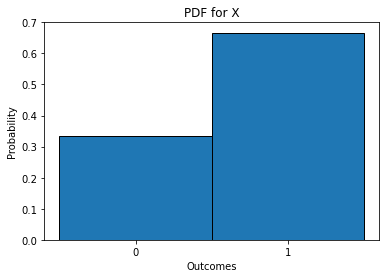

In [5]:
# First, simulate X = "count the heads showing when you flip an unfair coin
# where the probability of heads is p = 2/3 and tails is (1-p) = 1/3"
import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi, floor       
from numpy.random import seed, random
from collections import Counter
num_trials = 10**5

p = 2/3      

seed(0)

# Simulate the random variable X 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

def X():
    val = np.random.uniform(0,1)
    if val <= p:
        return 1
    return 0       # just to get it to compile

# Now demonstrate that it approximates the PDF shown in lecture

show_distribution( [ X() for i in range(num_trials)], "PDF for X" )

### Part B:  Simulate B

Next, we will use `X()` to create `B()`.    We will generalize this slightly in the code by using a variable `n` to hold the number of flips. 

In [16]:
# Next, simulate B = X_1 + X_2 + ... + X_n for a given n
import matplotlib.pyplot as plt   # normal plotting
import numpy as np
from math import log, pi, floor       
from numpy.random import seed, random
from collections import Counter
num_trials = 10**5

n = 5  
p = 2/3      

seed(0)

# Simulate the random variable X 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

def X():
    val = np.random.uniform(0,1)
    if val <= p:
        return 1
    return 0

def B():
    i = 0
    ans = 0
    for i in range(n):
        ans += X()
    print(ans)
    return ans         # your code here
def main():
    B()
    
main()

# Now demonstrate that it approximates the PDF shown in lecture, as done in Part A



4


##  Problem 2: Creating a random variable with an explicit formula (3 points)

In this problem you will implement the "flip until heads" random variable we have seen several times, most recently on slide 15 of Lecture 7:

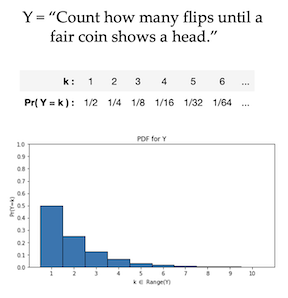





We will implement this using using an explicit function to transform the outcome of `random()` into the output of $Y$.  This is not possible for all distributions, but when it is, it the simplest (and most efficient) method.  

The following formula is from <a href="https://en.wikipedia.org/wiki/Geometric_distribution">Wikipedia</a>: if U is a random variable uniformly distributed in the range $[0..1)$, then

$$    1 + \lfloor \,\ln{( U )} \, \,/ \, \ln{( 1 - p )}  \,\rfloor$$            
          
is an integer which is distributed according to the PDF shown above with $p =$ 
probability of heads (here we use $p=0.5$) Technically, this is called a geometric distribution with parameter $p$, because the probabilities follow a geometric series
$p(1-p)^k$ for $k\ge 0$. 

Note: $\ln = \log_{\,e}$  (just <code>log(...)</code> in Python). We have imported `floor` from the `math` library in the first code cell. 


Complete the following template and demonstrate it as in the previous problem. Note that although the range of $Y()$ is infinite, with a finite number of trials, 
we will be able to display the results of the experiment in a finite range. 


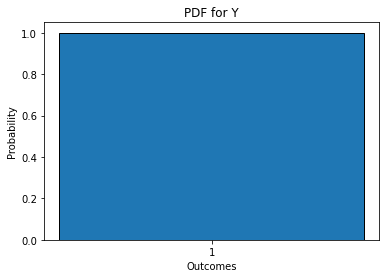

In [29]:

import matplotlib.pyplot as plt   # normal plotting
import numpy as np
from math import log, pi, floor       
from numpy.random import seed, random
from collections import Counter
p = 0.5
U = np.random.uniform(0,1)
num_trials = 10**5
#1+ np.math.floor(log(U)/log(1-p))
counter = 0
seed(0)
def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

def Y():
    ans =  1+ floor(np.log(U)/np.log(1-p))
    return ans 
                   # your code here
    
# Now demonstrate that it approximates the PDF shown in lecture, as done in Problem 1 (A)
show_distribution( [ Y() for i in range(num_trials)], "PDF for Y" )

## Problem 3: Generating a Distribution using the CDF (4 points)

In this problem we will investigate how to implement a random variable given by an arbitary PDF. 
We can use the CDF to obtain a function from a random variate in the range $[0..1)$ into  a random variate from the given distribution. 

The basic idea here is that the CDF is a function from outcomes to probabilities:

$$CDF_X\,:\,Range(X)\rightarrow [0..1).$$

However, from the CDF we can define another function which in a loose sense "inverts" the CDF:
a function from the interval $[0..1)$ into the outcomes:

$$F_X\, : \,[0..1)\rightarrow Range(X)$$ 

This essentially separates the range $[0..1)$ of `random()` into intervals corresponding
to the probabilities of the PDF, which correspond to the increases in the height of each
bar in the CDF. 

For example, suppose we start with the example from lecture:

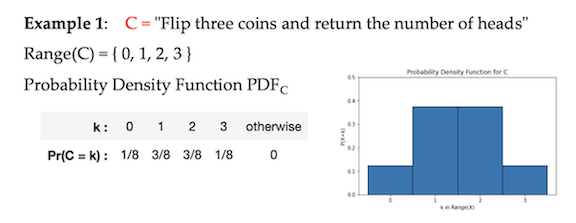

The corresponding intervals in $[0..1)$ are:

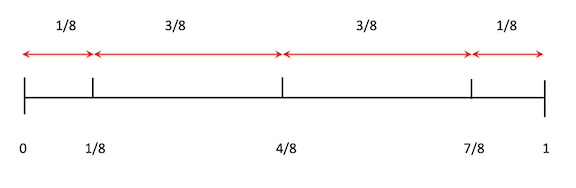

But, as noted in lecture, the increase in height in each bar of the CDF as we
go through the range is exactly the same as the probabilities in the PDF:

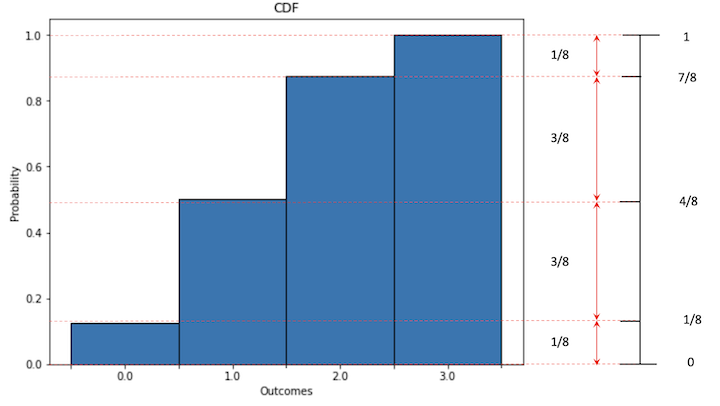

This suggests an appropriate way to using the CDF to transform a random variate in the range $[0..1)$ into
an outcome in the given distribution:


1. Using PDF, calculate the sequence of probabilities in the CDF;
2. Generate a random variate $r\in[0..1)$; and
3. Loop through the sequence calculated in step one, and determine which outcome corresponds to $r$. 

Notice that this extends the method used to code `X()` in Problem 1 (A) to more complex random variables!

For example, if we generate a random variate $r= 0.736475$, then we would output a 2:

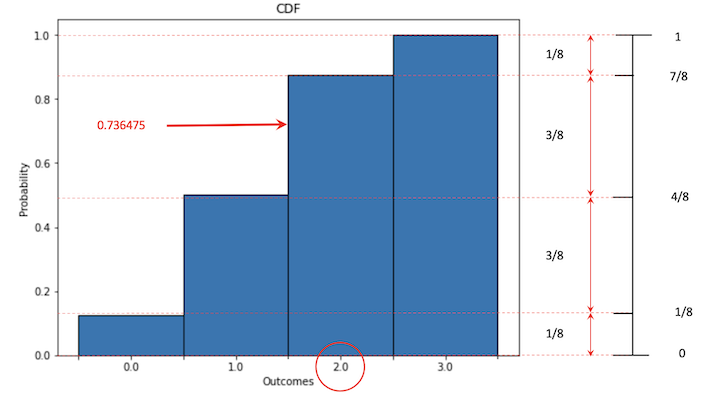

### OK, Your Turn!

In the following code cell, using the previous discussion, write an implementation of the random variable $Z$ from Lecture 7:

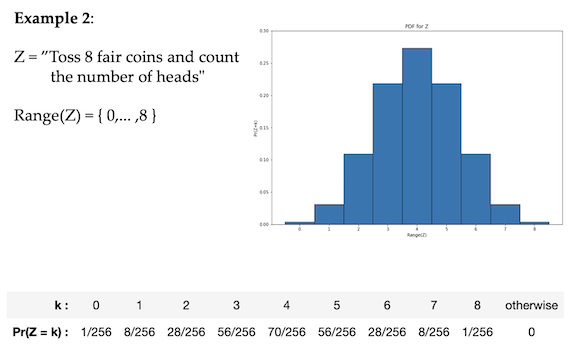


Define a function `Z` and demonstrate it by generating $10^5$ random variables and showing the distribution,
as in the first two problems. 

Notes:  

- You should use `X()` from Problem One with $p=0.5$; but of course
you will implement $Z$ in a completely different manner than you implemented $B$ in that problem. 

- Just specify the PDF as a list of probabilities as shown in the slide. 

- **Do NOT calculate the CDF by hand!** Make appropriate use of list slices and a list comprehension!

- Do NOT do more calculation inside `Z()` than necessary, since you will call it $10^5$ times; **calculate
the CDF outside the function!**

In [10]:
p = 0.5
U = np.random.uniform(0,1)
num_trials = 10**5
seed(0)
PDF  = [1/256, 8/256 28/256, 56/256 , 70/256, 56/256, 28/256, 8/256, 1/256]
CDF = [0,0,0,0,0,0,0,0,0]

for i in range( len(PDF)):
    if i == 0:
        CDF[i]+= PDF[i]
    else 
        CDF[i]+=CDF[i-1]+PDF[i]
        
def Z():
    val = random()
    for i in range (len(CDF)):
        if val < CDF[i]:
            return i
        
# Your code here